## This notebook is testing the simulation of Spikes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),".."))
sys.path.append(os.path.join(os.getcwd(),"..","code"))
data_path = os.path.join(os.getcwd(),"..",'data')
sys.path.append(data_path)

In [3]:
import filters
import likelihood_functions as lk
import PoissonProcessClasses as PP
import auxiliary_functions as auxfun

In [4]:
# Reloading modules which are in development
import imp
imp.reload(filters)
imp.reload(auxfun)
imp.reload(lk)
imp.reload(PP)

<module 'PoissonProcessClasses' from '/Users/val/MEGAsync/GLM_PythonModules/notebooks/../code/PoissonProcessClasses.py'>

In [5]:
# reading stimulus
Stim = np.array(pd.read_csv(os.path.join(data_path,'Stim.csv'),header = None))
# reading location of spikes
tsp = np.hstack(np.array(pd.read_csv(os.path.join(data_path,'tsp.csv'),header = None)))

In [6]:
Stim = np.array(pd.read_csv('/Users/val/Desktop/code_GLM_v1_Feb2010/myCode/Stim.csv',header = None))
tsp = np.array(pd.read_csv('/Users/val/Desktop/code_GLM_v1_Feb2010/myCode/Stim.csv',header = None))

In [7]:
dt = 0.01
tsp_int = np.ceil((tsp - dt*0.001)/dt)
tsp_int = np.reshape(tsp_int,(tsp_int.shape[0],1))
tsp_int = tsp_int.astype(int)
y = np.array([item in tsp_int for item in np.arange(Stim.shape[0]/dt)+1]).astype(int)

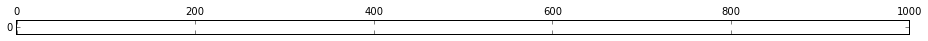

In [8]:
fig, ax = plt.subplots(figsize=(16, 2))
fig = ax.matshow(np.reshape(y[:1000],(1,len(y[:1000]))),cmap = 'Greys',aspect = 15)

In [9]:
# create a stimulus filter
kpeaks = np.array([0,round(20/3)])
pars_k = {'neye':5,'n':5,'kpeaks':kpeaks,'b':3}
K,K_orth,kt_domain = filters.createStimulusBasis(pars_k, nkt = 20) 

In [10]:
# create a post-spike filter
hpeaks = np.array([0.1,2])
pars_h = {'n':5,'hpeaks':hpeaks,'b':.4,'absref':0.}
H,H_orth,ht_domain = filters.createPostSpikeBasis(pars_h,dt)

In [11]:
# Interpolate Post Spike Filter
MSP = auxfun.makeInterpMatrix(len(ht_domain),1)
MSP[0,0] = 0
H_orth = np.dot(MSP,H_orth)

In [12]:
M_k = lk.construct_M_k(Stim,K,dt)

In [13]:
# M_h = lk.construct_M_h(tsp,H_orth,dt,Stim)

Combining $M_k$, $M_h$ and $\textbf{1}$ into one covariate matrix:

In [46]:
# M = np.hstack((M_k,M_h,np.ones((M_h.shape[0],1))))
M = np.hstack((M_k,np.ones((M_k.shape[0],1))))

In [47]:
coeff_k0 = np.array([ 0.061453,0.284916,0.860335,1.256983,0.910615,0.488660,-0.887091,0.097441,0.026607,-0.090147])

coeff_h0 = np.zeros((5,))
coeff_h0 = np.array([-10, -5, 0, 2, -2])

pars0 = np.hstack((coeff_k0,3,coeff_h0))

# pars0 = np.hstack((coeff_k0,3))

In [48]:
random.seed(0)

First check for M_k only.

In [49]:
tsp_sim = auxfun.simSpikes(pars0,M,H,ht_domain,dt = 0.01)

spike891
spike969
spike1111
spike1817
spike1934
spike2339
spike3321
spike3944
spike4021
spike4100
spike4738
spike4856
spike4973
spike5373
spike5504
spike5629
spike6276
spike7144
spike7149
spike7685
spike7783
spike8141
spike8242
spike8341
spike8799
spike8916
spike9284
spike9395
spike9711
spike10835
spike11184
spike11814
spike11869
spike11940
spike12019
spike12132
spike13758
spike14647
spike14809
spike14917
spike15080
spike15702
spike15740
spike15849
spike15940
spike16288
spike16783
spike16922
spike17456
spike18093
spike18561
spike18667
spike18999
spike19079
spike20229
spike20997
spike21018
spike21105
spike21469
spike22119
spike22291
spike22778
spike23429
spike23432
spike23513
spike24153
spike24264
spike24352
spike24980
spike25356
spike25438
spike25519
spike25926
spike27122
spike27326
spike27442
spike28635
spike28742
spike29219
spike29327
spike29755
spike29843
spike30519
spike30838
spike30932
spike31620
spike31629
spike31743
spike33301
spike33462
spike34197
spike34268
spike34716
spike353

In [51]:
# create the list of coefficients for each neuron

coeff_list = [np.hstack((coeff_k0,3,coeff_h0,coeff_h0,coeff_h0)),np.hstack((coeff_k0,3,coeff_h0,coeff_h0,coeff_h0)),np.hstack((coeff_k0,3,coeff_h0,coeff_h0,coeff_h0))]

In [49]:
coeff_list = [np.hstack((coeff_k0,3,coeff_h0,coeff_h0,coeff_h0))]*3




In [50]:
random.seed(0)

In [51]:
tsp_sim = auxfun.simSpikesMultiple(coeff_list,M,H,ht_domain,dt = 0.01)

spike297
spike346
spike797
spike992
spike1483
spike1522
spike1628
spike2001
spike2493
spike3332
spike3857
spike3885
spike3976
spike4039
spike4114
spike4606
spike4847
spike4936
spike5496
spike5541
spike5617
spike6057
spike6280
spike6382
spike6503
spike7001
spike7048
spike7504
spike7646
spike7734
spike8196
spike8228
spike8309
spike8363
spike8786
spike8793
spike9256
spike9389
spike9446
spike9541
spike9704
spike9776
spike9867
spike10312
spike10491
spike10976
spike11141
spike11206
spike11633
spike11838
spike11906
spike11972
spike12364
spike12379
spike13510
spike13771
spike14616
spike14832
spike14911
spike15360
spike15703
spike15802
spike15883
spike16215
spike16310
spike16814
spike16948
spike17321
spike17411
spike17502
spike17820
spike18275
spike18449
spike18526
spike18596
spike19062
spike19106
spike20315
spike20441
spike20924
spike21019
spike21123
spike21384
spike21477
spike21956
spike22360
spike22692
spike22790
spike23259
spike23363
spike23441
spike23887
spike24129
spike24257
spike24374
sp

In [52]:
len(tsp_sim[1])

355

In [53]:
len(tsp_sim[2])

358

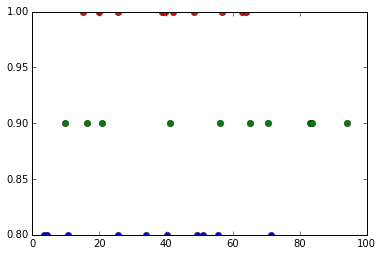

In [54]:
plt.plot(tsp_sim[0][:10],np.ones(len(tsp_sim[0][:10])),'ro')
plt.plot(tsp_sim[1][:10],0.9*np.ones(len(tsp_sim[1][:10])),'go')
plt.plot(tsp_sim[2][:10],0.8*np.ones(len(tsp_sim[2][:10])),'bo')